In [3]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

In [151]:
images = [
    '/Users/Anton/Documents/git/Eye-Data-Collection/record/Data/Person_1/targets/take1/person1.png',
    '/Users/Anton/Documents/git/Eye-Data-Collection/record/Data/Person_10/targets/take5/person1.png',
    '/Users/Anton/Documents/git/Eye-Data-Collection/record/Data/Person_17/targets/take10/person9.png',
    '/Users/Anton/Documents/git/Eye-Data-Collection/record/Data/Person_14/targets/take0/person6.png'
]

images = [cv.cvtColor(cv.imread(i), cv.COLOR_BGR2RGB) for i in images]

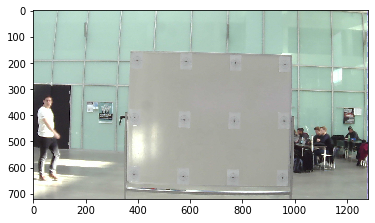

In [355]:
height, width, c = images[3].shape
base = images[0][height//2, width//2]
plt.imshow(images[3])

In [414]:
def find_board(image, output=False):
    height, width, c = image.shape
    
    copy = image.copy()
    copy = cv.medianBlur(copy, 21)
    
    if output:
        fig, ax = plt.subplots(1, 3, figsize=(16, 3))
        ax[0].imshow(copy)
    
    base = copy[height//2, width//2]
    thresh = cv.inRange(copy, base-10, base+10)
    
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (7, 7))
    thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=5)
    thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)
    
    if output:
        ax[1].imshow(thresh)
    
    _, contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    
    board_contour = max(contours, key=lambda c: cv.contourArea(c))
    
    new = np.zeros((height, width), dtype=np.uint8)
    copy = image.copy()
    rect = cv.minAreaRect(board_contour)
    box = cv.boxPoints(rect).astype(np.int)
    #x, y, w, h = cv.boundingRect(board_contour)
    #cv.rectangle(copy, (x, y), (x+w, y+h), (255, 0, 0), 3)
    new = cv.drawContours(new, [box], 0, 255, -1)
    
    copy = cv.bitwise_and(image, image, mask=new)
    
    if output:
        ax[2].imshow(copy)
        
    return copy
    

def find_targets(image, output=False):
    thresh = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    thresh = cv.equalizeHist(thresh)
    
    if output:
        fig, ax = plt.subplots(1, 3, figsize=(16, 4))
        plt.imshow(thresh, cmap='gray')
        
    _, thresh = cv.threshold(thresh, 5, 255, cv.THRESH_BINARY_INV)
    
    
    _, contours, h = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    small = list(filter(lambda x: 0 < cv.contourArea(x) < 20, contours))
    
    new = np.zeros(thresh.shape)
    cv.drawContours(new, small, -1, 255)
    
    if output:
        #fig, ax = plt.subplots(1, 3, figsize=(16, 4))
        ax[0].imshow(thresh)
        ax[1].imshow(new)

In [419]:
bimg = find_board(images[1])

In [420]:
bimg[400,600]

array([136, 137, 132], dtype=uint8)

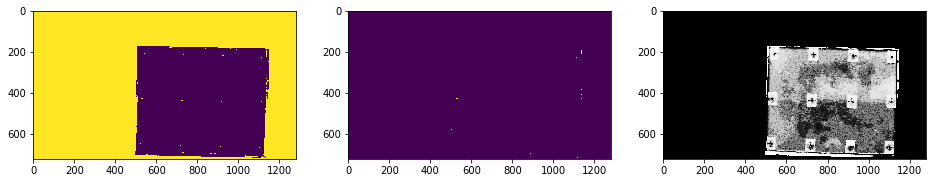

In [421]:
find_targets(bimg, True)

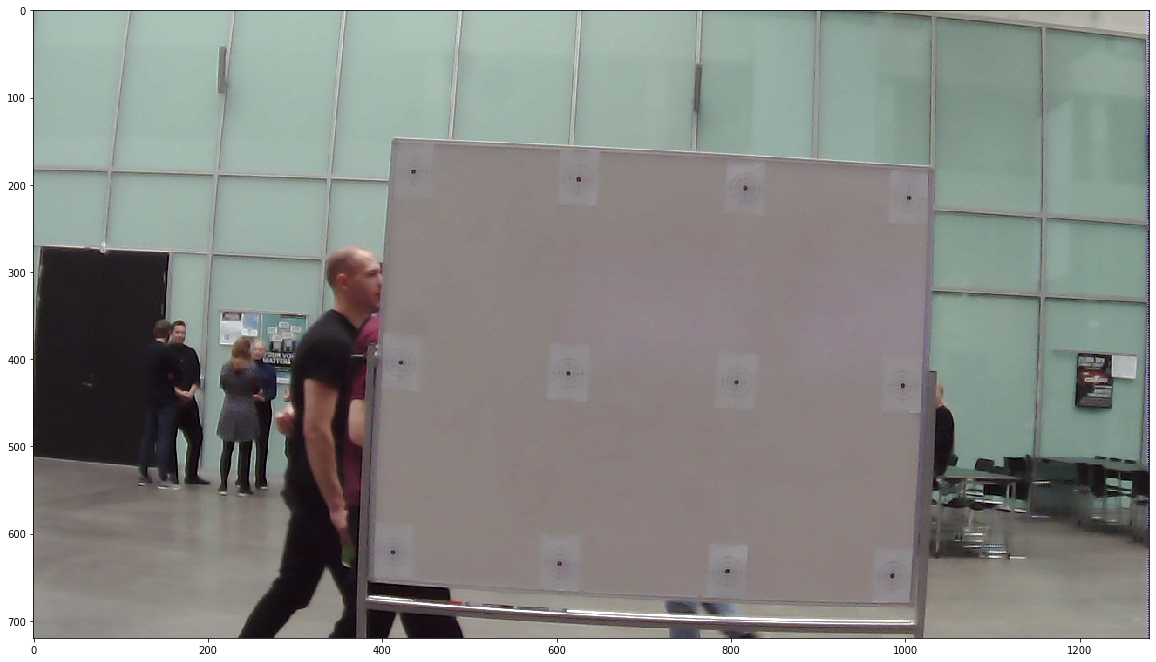

In [20]:
plt.figure(figsize=(20, 16))
plt.imshow(images[0])

In [30]:
height, width, c = images[0].shape
base = images[0][height//2, width//2]

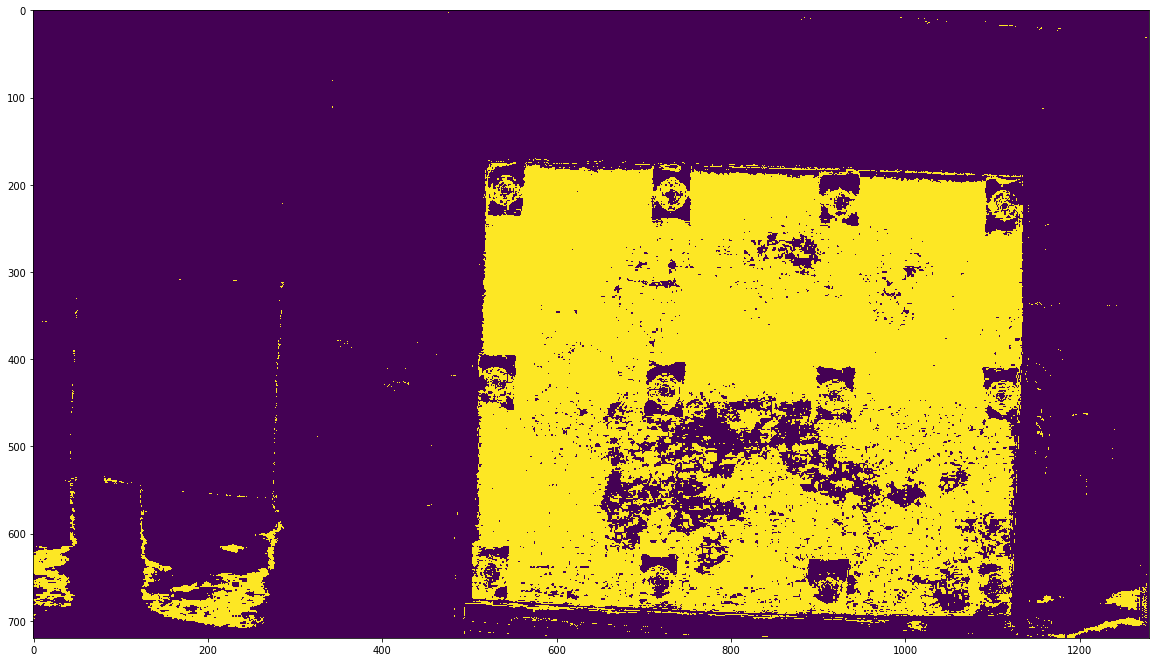

In [112]:
im = cv.inRange(images[1], base-10, base+10)
plt.figure(figsize=(20, 16))
plt.imshow(im)


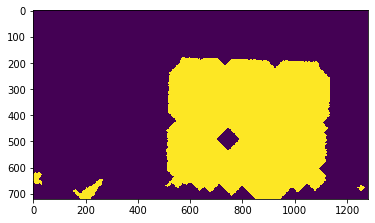

In [113]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (7, 7))
i2 = cv.morphologyEx(im, cv.MORPH_OPEN, kernel, iterations=2)
i2 = cv.morphologyEx(i2, cv.MORPH_CLOSE, kernel, iterations=15)
plt.imshow(i2)

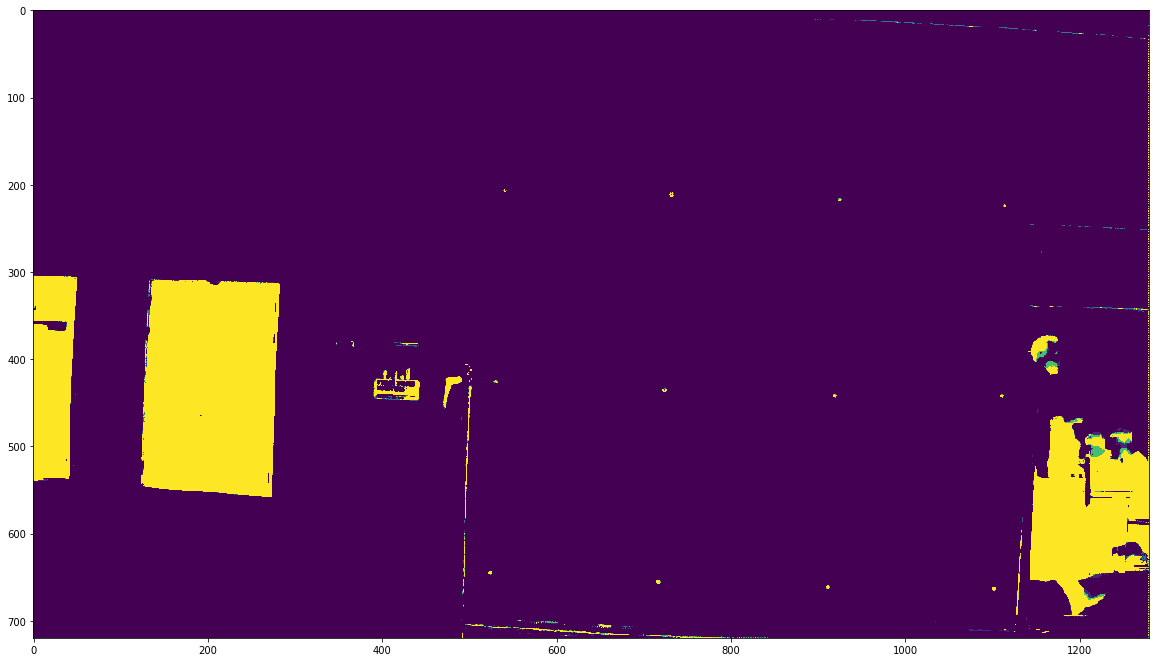

In [77]:
_, im = cv.threshold(images[1], 75, 255, cv.THRESH_BINARY_INV)
plt.figure(figsize=(20, 16))
imm = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
plt.imshow(imm)


In [78]:
im.shape

(720, 1280, 3)

In [79]:

_, con, h = cv.findContours(imm, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
len(con)

530

In [85]:
small = list(filter(lambda x: 0 < cv.contourArea(x) < 10, con))
len(small)

78

In [76]:
small

[array([[[611, 701]],
 
        [[611, 702]],
 
        [[620, 702]],
 
        [[612, 702]]], dtype=int32), array([[[509, 692]],
 
        [[508, 693]],
 
        [[509, 693]]], dtype=int32), array([[[376, 594]],
 
        [[376, 596]],
 
        [[376, 595]],
 
        [[377, 594]]], dtype=int32), array([[[1059,  574]],
 
        [[1058,  575]],
 
        [[1059,  575]]], dtype=int32), array([[[377, 554]],
 
        [[378, 555]],
 
        [[378, 554]]], dtype=int32), array([[[1065,  548]],
 
        [[1065,  549]],
 
        [[1066,  548]]], dtype=int32), array([[[1079,  544]],
 
        [[1079,  545]],
 
        [[1080,  546]],
 
        [[1079,  545]],
 
        [[1080,  544]]], dtype=int32), array([[[1072,  540]],
 
        [[1074,  540]],
 
        [[1075,  541]],
 
        [[1075,  540]]], dtype=int32), array([[[1222,  517]],
 
        [[1221,  518]],
 
        [[1220,  518]],
 
        [[1222,  518]]], dtype=int32), array([[[215, 489]],
 
        [[215, 490]],
 
        [[216,

In [70]:
a = [cv.contourArea(c) for c in con]
a

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 2.0,
 4.0,
 0.0,
 0.0,
 2.0,
 0.0,
 4.0,
 13.0,
 2.0,
 9.5,
 10.0,
 5.5,
 0.0,
 4.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 8.0,
 10.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 4.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 9.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 4.0,
 2.5,
 1.5,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.0,
 0.5,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0,
 0.0,
 0.0,
 0.0,
 2.0,
 10.0,
 6.0,
 1.0,
 4.5,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 2.0,
 0.5,
 8.0,
 0.0,
 3.5,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 13.0,
 0.0,
 0.0,